#  IDEA LAB 4th Weekly Seminar Conference Code File
<h2> KNN From Scratch in Python</h2> 
<h3> Writer: Su-Yeon Kang </h3>
2022.08.02
writer: Su-Yeon Kang

In [170]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1>KNN Algorithm</h1>
유형: 지도학습

분류 항목을 이미 알고 있는 데이터 집합에서 상위 K개의 가장 유사한 데이터를 살펴보고, 

K개의 가장 유사한 데이터들 중 다수결(majority vote)를 통해 새로운 데이터의 분류 항목을 결정하는 알고리즘

## 예제 데이터 )  영화 분석 결과



#### 데이터 ) 각 영화 별 싸움 횟수와 키스 횟수

| 영화 제목 | the number of Kick | The number os Kiss | Type |
| ------  | ----| ----| --- |
| 냉정과열정사이 | 3 | 104 | Romance|
| 바람과함께사라지다 | 2 | 100 | Romance |
| 아름다운 여인 | 1 | 81 | Romance |
| 인정사정볼것없다 | 101 | 10 | Action |
| 놈놈놈 | 99 | 5 | Action |
| 화랑 | 98 | 2 | Action |
| 뜨거운 가슴으로 | 25 | 87 | ? |

In [171]:
# 0번째 열 : 킥 횟수, 1번째 열 : 키스 횟수

dataset = np.array([
    [3, 104],
    [2, 100],
    [1, 81],
    [101, 10],
    [99, 5],
    [98, 2]
])

labels = np.array(['Romance','Romance','Romance',
          'Action','Action','Action'])
dataset_DF= pd.DataFrame(dataset,labels,columns = ['Kick', 'Kiss'])
dataset_DF

,Kick,Kiss
Romance,3,104
Romance,2,100
Romance,1,81
Action,101,10
Action,99,5
Action,98,2


In [172]:
dataset_DF.cov()

,Kick,Kiss
Kick,2843.466667,-2601.466667
Kiss,-2601.466667,2461.066667


In [173]:
new_row = {'Kick': inX[0], 'Kiss' : inX[1]}    
new_df = dataset_DF.append(new_row, ignore_index=True) 
new_df 

,Kick,Kiss
0,3,104
1,2,100
2,1,81
3,101,10
4,99,5
5,98,2
6,19,72


In [174]:
new_df.cov()

,Kick,Kiss
Kick,2512.809524,-2265.904762
Kiss,-2265.904762,2117.952381


In [175]:
new_df.to_numpy()

array([[  3, 104],
       [  2, 100],
       [  1,  81],
       [101,  10],
       [ 99,   5],
       [ 98,   2],
       [ 19,  72]], dtype=int64)

In [176]:
def desclibing(dataset, inX):
    plt.title("The Category of Movie")
    plt.scatter(dataset[:3,0],dataset[:3,1],label='Romance',
                c='g')
    plt.scatter(dataset[3:,0],dataset[3:,1],label='Action',
                c='r')
    plt.scatter(inX[0],inX[1],label="new_data",
                c='b')
    

    plt.xlabel('The number of Kick')
    plt.ylabel('The number of Kiss')
    plt.legend()
    plt.show()

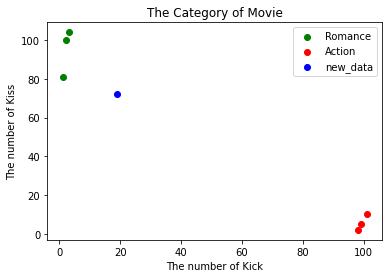

In [177]:
desclibing(dataset, inX)

파란 색의 경우는 어느 카테고리에 속할까요? 이 두 가지 특징 "킥 횟수"와 "키스 횟수"로 미루어 판단하건대, Romance에 가까운 작품으로 판단됩니다. 이를 좀 더 정량적으로 판단하면, 자기의 값과 비슷한, 인근 K개(임의의 수, 보통 20개 미만)의 데이터를 뽑아오고, 그 중에서 다수결을 통해 새로운 데이터의 분류 항목을 결정할 수 있을 것입니다. 이러한 분류 방법을 K-NN이라고 합니다. 

#  KNN 구현 순서

KNN의 알고리즘 순서는 다음과 같습니다. 

1. 우리가 분류항목을 알고자 하는 점(inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산
2. 오름 차순으로 거리의 길이를 정렬
3. inX와의 거리가 가장 짧은 K개의 아이템 추출
4. K개의 아이템에서 가장 많은 분류 항목 찾기
5. 해당 항목 반환


## 1. KNN 거리 공식 작성

<h3>- 우리가 분류항목을 알고자 하는 점 (inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산</h3>


거리공식은 유클리드 거리, 맨해튼 거리, 마할라노비스 거리를 구현하였습니다.

Euclidean Distance
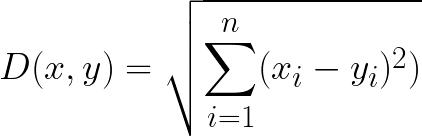

In [178]:
def Euclidean_Distance(dataset, inX):
    data_distance = []
    for i in range(len(dataset)):
        data_distance.append(np.sqrt((dataset[i][0] - inX[0])**2 + (dataset[i][1] - inX[1])**2 ))
    return data_distance

Manhattan Distance
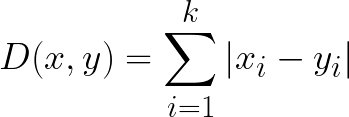

In [179]:
def Manhattan_Distance(dataset, inX):
    data_distance = []
    for i in range(len(dataset)):
        data_distance.append(np.abs((dataset[i][0] - inX[0]) + (dataset[i][1] - inX[1])))
    return data_distance

마할라노비스 거리 공식
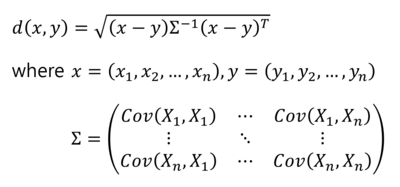

In [180]:
# def Mahalanobis_Distance(dataset, inX):
#     length = len(dataset) # 데이터의 개수
#     x1_mean, x2_mean = dataset.mean(axis=0)
#     x1_sum, x2_sum = dataset.sum(axis=0)
    
#     cov_xx = []
#     cov_yy = []
#     cov_xy = []
#     cov_yx = []
#     for i in range(len(dataset)):
#     # 공분산 구하기
#         np.cov(a1, a2)
#         cov_xx.append((dataset[i][0] - x1_mean)**2)
#         cov_yy.append((dataset[i][1] - x2_mean)**2)
#         cov_xy.append((dataset[i][0] - x1_mean)*(dataset[i][1] - x2_mean))
#         cov_yx.append((dataset[i][1] -x2_mean)*(dataset[i][0] - x1_mean))
    
#     # 공분산
#     sum_cov_xx = sum(cov_xx) / length
#     sum_cov_yy = sum(cov_yy) / length
#     sum_cov_xy = sum(cov_xy) / length
#     sum_cov_yx = sum(cov_yx) / length
    
#     # 공분산 행렬
#     cov_metrix = np.array([[sum_cov_xx,sum_cov_xy],[sum_cov_yx,sum_cov_yy]])
#     # 공분산 행렬의 역행렬
#     inverse_cov_metrix = np.linalg.inv(cov_metrix)
    
#     dist = []
#     # x-y
#     for i in range(length):
        
#         delta = np.array([dataset[i][0] - x1_mean, dataset[i][1] - x2_mean])
#         delta_T = np.transpose(delta)
#         cal1 = np.dot(delta,inverse_cov_metrix)
#         cal2 = np.dot(cal1,delta_T)
#         D_squre = np.sqrt(cal2)
#         dist.append(D_squre)
#     return dist

In [181]:
def Mahalanobis_Distance(dataset, inX):
    length = len(dataset) # 데이터의 개수
    x1_mean, x2_mean = dataset.mean(axis=0)
    x1_sum, x2_sum = dataset.sum(axis=0)
    
    # 새로운 데이터를 추가하고 공분산 구하기
    new_row = {'Kick': inX[0], 'Kiss' : inX[1]}    
    new_df = dataset_DF.append(new_row, ignore_index=True) 
    new_df_cov = new_df.cov()
    new_np_cov = new_df_cov.to_numpy()
    inverse_cov_metrix = np.linalg.inv(new_np_cov)
    dist = []
    # x-y
    for i in range(length):
        delta = np.array([dataset[i][0] - inX[0], dataset[i][1] - inX[1]])
        delta_T = np.transpose(delta)
        cal1 = np.dot(delta,inverse_cov_metrix)
        cal2 = np.dot(cal1,delta_T)
        D_squre = np.sqrt(cal2)
        dist.append(D_squre)
    return dist

In [182]:
Euclidean_Distance(dataset, inX)

[35.77708763999664,
 32.7566787083184,
 20.12461179749811,
 102.80077820717118,
 104.35037134576953,
 105.55093557141026]

In [183]:
Manhattan_Distance(dataset, inX)

[16, 11, 9, 20, 13, 9]

In [184]:
Mahalanobis_Distance(dataset, inX)

[2.058136613024007,
 1.5047785478873044,
 0.9105203287354701,
 2.141372394328008,
 1.7031063654392802,
 1.5824600601341565]

##  2. KNN 알고리즘 작성

In [185]:
def classify_knn(dists,dataset, inX,labels, K):
    print(dists)
    sorted_index = np.argsort(dists)
    sorted_labels = np.array(labels[sorted_index[:]])
    K_nearest_labels = sorted_labels[:K]
    count_dict = {}
    for label in K_nearest_labels:
        count_dict[label] = count_dict.get(label,0) + 1
        _labels, count_labels = np.array(list(count_dict.keys())), np.array(list(count_dict.values()))
    result = _labels[count_labels.argmax()]
    return desclibing(dataset, inX,result),result

In [186]:
# KNN을 COUNTER 모듈을 이용하여 구현
from collections import Counter

def classify_knn_Counter(dists,dataset, inX,labels, K):
    print(dists)
    sorted_index = np.argsort(dists) # 거리가 짧은 곳의 인덱스를 오름차순으로 정렬
    sorted_labels = np.array(labels[sorted_index[:]]) # 해당 인덱스에 해당 레이블 입력
    K_nearest_labels = sorted_labels[:K] # 가까운 K개만 추출
    count = Counter(K_nearest_labels)# 가장 많은 요소 추출
    result = max(count, key=count.get)
    return desclibing(dataset, inX,result),result

시각화

In [187]:
def desclibing(dataset, inX,label):
    plt.title("The Category of Movie")
    plt.scatter(dataset[:3,0],dataset[:3,1],label='Romance',
                c='g')
    plt.scatter(dataset[3:,0],dataset[3:,1],label='Action',
                c='r')
    if label == 'Romance':
        plt.scatter(inX[0],inX[1],label="new_data",
                c='g')
    elif label == 'Action':
        plt.scatter(inX[0],inX[1],label="new_data",
                c='r')
    

    plt.xlabel('The number of Kick')
    plt.ylabel('The number of Kiss')
    plt.legend()
    plt.show()

### 마할라노비스 거리 계산 사이킷런과  직접 쓴 코드 비교 

[0.5788633064089691, 1.0020806958930701, 3.0128310730703096, 1.653894797100614, 2.007084575299957, 2.2900275049546033]


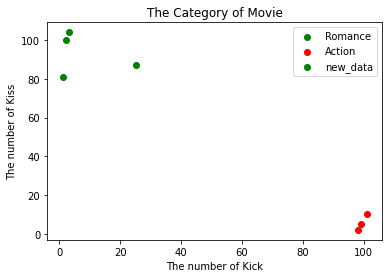

(None, 'Romance')

In [188]:
dataset = np.array([
    [3, 104],
    [2, 100],
    [1, 81],
    [101, 10],
    [99, 5],
    [98, 2],
])
inX =  np.array([25, 87]) 
dists_MAH = Mahalanobis_Distance(dataset, inX)
classify_knn_Counter(dists_MAH,dataset, inX,labels, 4)

In [189]:

from sklearn.neighbors import NearestNeighbors
import numpy as np
dataset = np.array([
    [3, 104],
    [2, 100],
    [1, 81],
    [101, 10],
    [99, 5],
    [98, 2],
])
inX =  np.array([25, 87]) 
neigh = NearestNeighbors(n_neighbors=4,metric='mahalanobis')
neigh.fit(dataset) 
print(neigh.kneighbors([[25, 87]])) # use any point to test

(array([[0.57886331, 1.0020807 , 1.6538948 , 2.00708458]]), array([[0, 1, 3, 4]], dtype=int64))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(


<h2> 구현 결과 </h2>

In [190]:
# 킥 횟수가 52번, 키스 횟수가 10번인 작품
k = 4
inX = [52, 10]
dists_EUC = Euclidean_Distance(dataset, inX)
dists_MAN = Manhattan_Distance(dataset, inX)
dists_MAH = Mahalanobis_Distance(dataset, inX)

[106.00471687618433, 102.95630140987001, 87.41853350405736, 49.0, 47.265209192385896, 46.69047011971501]


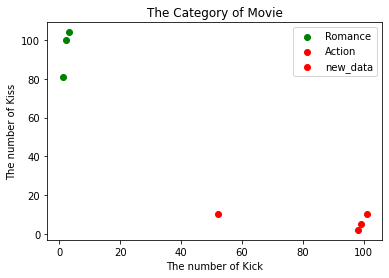

(None, 'Action')

In [191]:
classify_knn_Counter(dists_EUC,dataset,inX, labels, k) 

[45, 40, 20, 49, 42, 38]


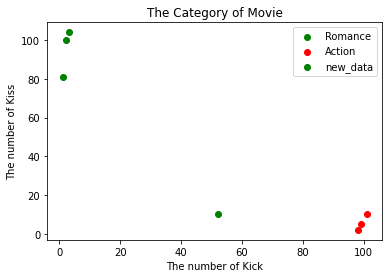

(None, 'Romance')

In [192]:
classify_knn_Counter(dists_MAN,dataset,inX, labels, k) 

[3.0680427226499933, 2.8024367310293203, 1.772473311728637, 2.8438863169310977, 2.453539018695724, 2.2336499161610934]


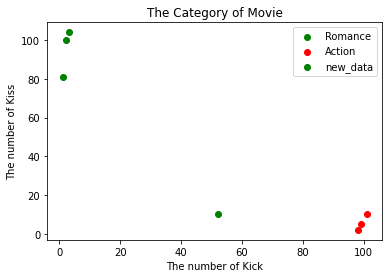

(None, 'Romance')

In [193]:
classify_knn_Counter(dists_MAH,dataset,inX, labels, k) 

In [194]:
# 킥 횟수가 19번, 키스 횟수가 72번인 작품
k = 4
inX = [19, 72]
dists_EUC = Euclidean_Distance(dataset, inX)
dists_MAN = Manhattan_Distance(dataset, inX)
dists_MAH = Mahalanobis_Distance(dataset, inX)

[35.77708763999664, 32.7566787083184, 20.12461179749811, 102.80077820717118, 104.35037134576953, 105.55093557141026]


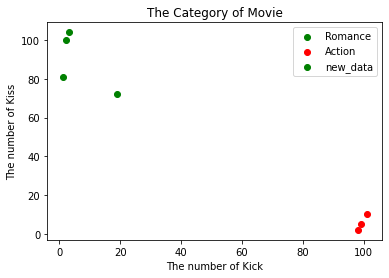

[16, 11, 9, 20, 13, 9]


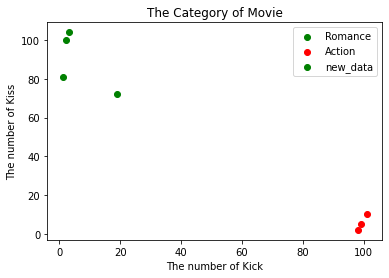

[2.058136613024007, 1.5047785478873044, 0.9105203287354701, 2.141372394328008, 1.7031063654392802, 1.5824600601341565]


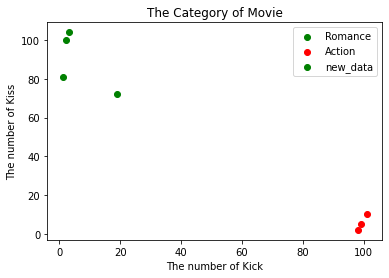

(None, 'Romance')

In [195]:
classify_knn(dists_EUC,dataset,inX, labels, k) 
classify_knn(dists_MAN,dataset,inX, labels, k) 
classify_knn(dists_MAH,dataset,inX, labels, k) 